# Predicting Diabetes
By - Om Mistry

## 1. Introduction

In [13]:
#Imports here
import pandas as pd                   
import matplotlib.pyplot as plt        
import seaborn as sns                  
sns.set()  
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### **Data Introduction:** 
The dataset of interest is based on medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

### **Motivation:** 
Motivations for our research are primarily for the following:
1) Explore the relationship between variables like age, gender, body mass index (BMI), hypertension, heart disease, smoking history, blood glucose level on HbA1c level, and whether a patient would have diabetes or not.
2) Predict whether a patient has diabetes status based on patient characteristics.

By navigating different patient characteristics, health officials can identify individuals who are more at risk of developing diabetes status and prevent issues from worsening. 

### **Research Questions:** 
- Is there a relationship between the smoking history of an individual and their HbA1c level after controlling their age, and whether that person has heart disease and hypertension? 
- Is there a linear relationship between the log-odds of getting diabetes and bmi, hemoglobin levels, and blood glucose levels in the data?

The first question can be used to identify how smoking history and HbA1c level interact with each other after controlling age, and whether that person has heart disease and hypertension. The second question can be helpful to know what the relationship between getting diabetes and bmi, hemoglobin levels, and blood glucose levels are. The information gained from asking these questions can help identify individuals at risk of diabetes.

## 2. Linear Regression Analytical Tasks

**Research Question:**
Is there a relationship between HbA1c_level and the smoking history of an individual after controlling the age, whether that person has heart disease and hypertension.

**Linear Regression Model:**

In [39]:
df = pd.read_csv("diabetes_prediction_dataset.csv", na_values = ['?'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1103)

In [16]:
results = smf.ols("HbA1c_level ~ smoking_history + heart_disease + hypertension + age", data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HbA1c_level   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.45e-258
Time:                        21:22:58   Log-Likelihood:            -1.1826e+05
No. Observations:               80000   AIC:                         2.365e+05
Df Residuals:                   79991   BIC:                         2.366e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          5.3368      0.009    614.174      0.000       5.320       5.354
smoking_history[T.current]         0.0326      0.014      2.332      0.020       0.005       0.060
smoking_history[T.ever]            0.0487      0.020      2.434      0.015       0.009       0.088
smoking_history[T.former]          0.0652      0.014      4.532      0.000       0.037       0.093
smoking_history[T.never]           0.0296      0.009      3.255      0.001       0.012       0.047
smoking_history[T.not current]     0.0432      0.016      2.652      0.008       0.011       0.075
heart_disease                      0.2206      0.020     11.077      0.000       0.182       0.260
hypertension                       0.2282      0.015     15.456      0.000       0.199       0.257
age                                0.0033      0.000     17.952      0.000       0.003       0.004
==============================================================================
Omnibus:                      244.906   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.493
Skew:                          -0.130   Prob(JB):                     1.10e-54
Kurtosis:                       3.085   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicted HbA1c_level (ŷ)= 5.3368 + 0.0326*smoking_history[T.current] + 0.2206*heart_disease + 0.2282*hypertension + 0.0033*age

**Examining the relationship between variables:**

Note: The baseline level for smoking history is "no info".

The slope coefficient is 0.0362, meaning current smokers have an average HbA1c level that is 0.0362 units higher than those for whom there is no smoking history information, keeping all other variables constant.

**Confidence Interval:**

I'm 95% confident that the population slope for how the person who currently smokes affects the chances of that person having diabetes is contained in the interval (0.005, 0.060).

In [45]:
X = df[['age','hypertension','heart_disease','smoking_history']]

In [18]:
y=df['HbA1c_level']

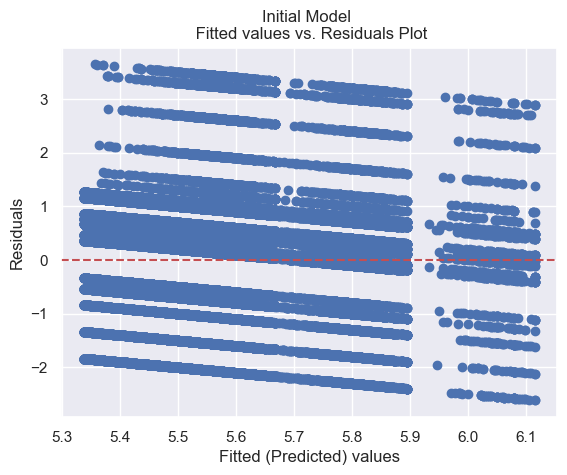

In [19]:
y_pred = results.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Initial Model \n Fitted values vs. Residuals Plot')
plt.show()

**Model Perfomance:**

R² interpretation:

R² = 0.015

An R-squared score of 0.015 indicates that the model explains 1.5% of the variability in the response variable, based on the data used to train the model. This value means that the model's ability to predict or account for the variations in the response variable is very limited.

In [42]:
y_ = df_test['heart_disease']

In [43]:
residual_ = y_ - 5.5574
residual_

9706    -5.5574
28870   -5.5574
88242   -5.5574
29522   -5.5574
44512   -5.5574
          ...  
34243   -4.5574
34396   -5.5574
95025   -5.5574
514     -5.5574
96046   -4.5574
Name: heart_disease, Length: 20000, dtype: float64

**RMSE calculations for test and training datasets:**

In [40]:
rmse = np.sqrt((1/80000 * np.sum((df['HbA1c_level'] - results.predict(df_train))**2)))
rmse

1.0610860467168293

In [41]:
rmse = np.sqrt((1/80000 * np.sum((df['HbA1c_level'] - results.predict(df_test))**2)))
rmse

0.5335092239221593

We would ideally want the rmse values close to 0. Here, the rmse value for training dataset is 1.0610860467168293, while lower for the testing dataset 0.5335092239221593. Although not near 0, the testing dataset rmse value is lower than that of the training which shows us that the model error for HbA1c_level is lower in the testing dataset. 

**Conclusion:**

With a lower R² value of .015, it indicates that the model explains only 1.5% of the variability in the response variable, based on the data used to train the model. This value means that the model's ability to predict or account for the variations in the response variable is very limited. Along with that, the fitted vs residual plot is unusual with patterns that are not linear. All of these make us believe that linear regression might not be the right model for evaluating the effect of predictor variables like age, hypertension, and heart disease on our response variable HbA1c_level. 

## 3. Logistic Regression Analytical Tasks

**Research Question:**
Is there a linear relationship between the log-odds of getting diabetes and bmi, hemoglobin levels, and blood glucose levels in the data?

**Logistic Regression Model:**

In [29]:
#1 indicates presence of diabetes and 0 represents no presence of diabetes
df_1 = pd.read_csv("diabetes_prediction_dataset.csv")
df_1train, df_1test = train_test_split(df_1, test_size = 0.2, random_state = 2026)

In [30]:
log_model = smf.logit("diabetes ~ HbA1c_level + bmi + blood_glucose_level", data = df_1train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.132003
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79996
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.5436
Time:                        13:13:41   Log-Likelihood:                -10560.
converged:                       True   LL-Null:                       -23139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -25.3029      0.289    -87.516      0.000     -25.870     -24.736
HbA1c_level             2.3870      0.038     62.516      0.000       2.312       2.462
bmi                     0.0970      0.002     39.196      0.000       0.092       0.102
blood_glucose_level     0.0341      0.000     68.868      0.000       0.033       0.035
=======================================================================================
"""

In [33]:
df_1train['predictive_prob'] = log_model.predict(df_1train)
df_1train[['predictive_prob','diabetes']].head()

fprs, tprs, thresholds = roc_curve(y_true = df_1train['diabetes'], 
                            y_score = df_1train['predictive_prob'])

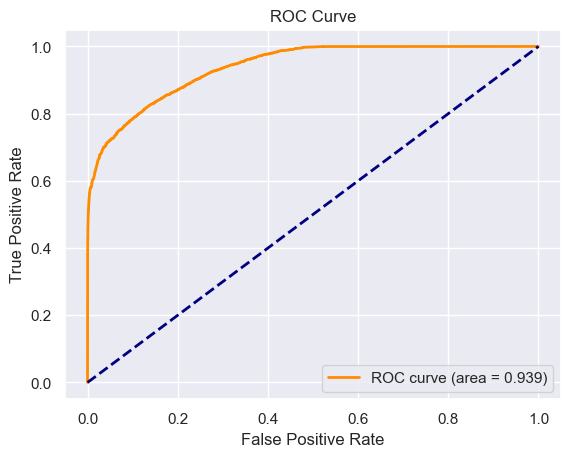

In [36]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
auc = roc_auc_score(y_true=df_1train['diabetes'], 
                            y_score=df_1train['predictive_prob'])
plot_roc(fprs, tprs, auc)

 - For an individual with hemoglobin levels of 1, the predicted log odds of having diabetes increases by 2.3870, on average, holding all other variables constant. Higher hemoglobin levels are associated with higher probability of success (success = having diabetes).
 - For an individual with bmi levels of 1, the predicted log odds of having diabetes increases by 0.0970, on average, holding all other variables constant. Higher bmi levels are associated with higher probability of success (success = having diabetes).
 - For an individual with blood glucose levels of 1, the predicted log odds of having diabetes increases by 0.0341, on average, holding all other variables constant. Higher blood glucose levels are associated with higher probability of success (success = having diabetes).

With an AUC score of 0.939, the model has a predictive probability threshold that performs well. An pseudo-R^2 value of 0.5436 indicates that the explanatory variables in the model perform well and the model is a good fit.

**Building our Classifier:**

Given the context of this data, we would want to minimize the likelihood of a false negative. A false negative would predict that a given patient does not have diabetes when in reality they do. Finding treatment early on and ways to prevent diabetes can be important. If a patient is told they do not have signs of diabetes (when they truly do), they may never get it checked out and end up suffering when it eventually comes.

A false positive would be a lot less detrimental in comparison to a false negative. If we want to minimize the likelihood of a false negative, we would want to increase the TPR as much as possible without sacrificing the FPR. The predictive probability threshold we chose would be somewhere between (0, 0.1)

**Evaluating our Classifier:**

In [38]:
df_1["phat"] = log_model.predict(df)
df_1["yhat"] = 1*(df_1["phat"] >= 0.05)
spec = 72331/(72331 + 19169)
acc_rate = (72331 + 7465)/(7465 + 1035 + 72331 + 19169)
sens = 7465/(7465 + 1035)
pd.crosstab(df_1["yhat"],df_1["diabetes"])
print(spec, acc_rate, sens)

0.7905027322404372 0.79796 0.8782352941176471


- The specificity is 0.7905027322404372
- The accuracy rate is 0.79796
- The sensitivity is 0.8782352941176471

**Conclusions:**
With a relatively high AUC and pseudo R^2 value, we have evidence to suggest that the explanatory variables used (hemoglobin levels, bmi, and blood glucose levels) provide a good model to assess the likelihood of an individual developing diabetes. Using a low predictive probability threshold reduces the chance of an individual getting a false negative. Minimizing a low false negative rate is important to ensure the safety of individuals and make sure that they get treatment if necessary.

## 4. Conclusion

### **Summarization:** 
Based on the linear regression model we fit, we're 95% confident that the population slope for how the person who currently smokes affects the chances of that person having diabetes is contained in the interval (0.005, 0.060). Alongside that, based on the logistic model with a relatively high AUC and pseudo R^2 value, we have evidence to suggest that the explanatory variables used (hemoglobin levels, bmi, and blood glucose levels) provide a good model to assess the likelihood of an individual developing diabetes. Using a low predictive probability threshold reduces the chance of an individual getting a false negative. Minimizing a low false negative rate is important to ensure the safety of individuals and make sure that they get treatment if necessary.

### **Limitations:** 
There are several limitations to our analysis, results, and interpretations. Firstly, our dataset is limited in the different patient characteristics that may influence the likelihood of an individual having diabetes. Therefore, we cannot confidently state that the characteristics chosen for this research are the sole predictors in identifying diabetes. Furthermore, in this research, we only identify whether a patient has or does not have diabetes. There is no indication of what type of diabetes a patient has, which may be influenced by other factors. For those looking for treatment and prevention described in the introduction, different measures may be taken depending on the type of diabetes. 

### **Future Work:** 
For future analyses, it may be beneficial to explore the other variables that were not tested in this specific. For instance, patient sex was not used in our analyses but can offer the potential to be an important factor.